In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import csv
import random

ModuleNotFoundError: No module named 'keras'

In [10]:
def load_data(path_data):
    data = []
    label = []
    with open(path_data, 'r') as csv_file:
        result = csv.reader(csv_file)
        data_csv = []
    
    # đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
        for row in result:
            data_csv.append(row)
    for letter in data_csv:
        x = np.array([int(j) for j in letter[1:]])
        x = x.reshape(28,28)
        data.append(x)
        label.append(int(letter[0]))
    return data, label

In [11]:
# load data and label train
train_data = []
train_label = []
path_data_train = './Input_image/Plate_license_train.csv'
train_data, train_label = load_data(path_data_train)
# load data and label val
val_data = []
val_label = []
path_data_val = './Input_image/Plate_license_val.csv'
val_data, val_label = load_data(path_data_val)
# load data and lable test
test_data = []
test_label = []
path_data_test = './Input_image/Plate_license_test.csv'
test_data, test_label = load_data(path_data_test)

In [12]:
def Shuffle_data(data, label):
    i = int(len(data))
    shuffle_order  = list(range(i))
    random.shuffle(shuffle_order)
    
    data = np.array(data)
    label = np.array(label)
    
    data = data[shuffle_order]
    label = label[shuffle_order]
    
    return data, label

In [13]:
train_data, train_label = Shuffle_data(train_data, train_label)
val_data, val_label = Shuffle_data(val_data, val_label)
test_data, test_label = Shuffle_data(test_data, test_label)

In [15]:
IMG_SIZE = 28
N_CLASSES = 10

input_shape=(28,28,1)

In [16]:
train_data = train_data.reshape(train_data.shape[0], IMG_SIZE, IMG_SIZE, 1)
val_data = val_data.reshape(val_data.shape[0], IMG_SIZE, IMG_SIZE, 1)
test_data = test_data.reshape(test_data.shape[0], IMG_SIZE, IMG_SIZE, 1)

In [17]:
original_label = test_label

train_label =  np_utils.to_categorical(train_label, N_CLASSES)
val_label = np_utils.to_categorical(val_label, N_CLASSES)
test_label = np_utils.to_categorical(test_label, N_CLASSES)

In [18]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [19]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
H = model.fit(train_data, train_label, validation_data=(val_data, val_label),
          batch_size=32, epochs=10, verbose=1)

Train on 8550 samples, validate on 2850 samples
Epoch 1/10
8550/8550 [==============================] - 21s 2ms/step - loss: 0.0522 - acc: 0.9911 - val_loss: 0.0750 - val_acc: 0.9807
Epoch 2/10
8550/8550 [==============================] - 21s 2ms/step - loss: 0.0375 - acc: 0.9926 - val_loss: 0.0701 - val_acc: 0.9814
Epoch 3/10
8550/8550 [==============================] - 21s 2ms/step - loss: 0.0280 - acc: 0.9947 - val_loss: 0.0603 - val_acc: 0.9835
Epoch 4/10
8550/8550 [==============================] - 21s 2ms/step - loss: 0.0237 - acc: 0.9954 - val_loss: 0.0703 - val_acc: 0.9811
Epoch 5/10
8550/8550 [==============================] - 21s 2ms/step - loss: 0.0199 - acc: 0.9965 - val_loss: 0.0563 - val_acc: 0.9846
Epoch 6/10
8550/8550 [==============================] - 21s 2ms/step - loss: 0.0170 - acc: 0.9966 - val_loss: 0.0541 - val_acc: 0.9835
Epoch 7/10
8550/8550 [==============================] - 21s 2ms/step - loss: 0.0149 - acc: 0.9972 - val_loss: 0.0480 - val_acc: 0.9881
Epoch 8

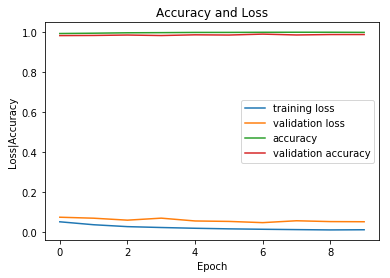

In [23]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

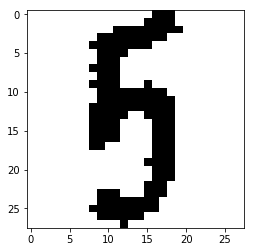

Giá trị dự đoán:  5


In [27]:
# 10. Dự đoán ảnh
plt.imshow(test_data[50].reshape(28,28), cmap='gray')
plt.show()
y_predict = model.predict(test_data[50].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

In [28]:
model.save('CNN_1_9_1CNN.hdf5')
del model

In [30]:
from keras.models import load_model

In [31]:
model = load_model('CNN_1_9_1CNN.hdf5')